<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/CNNs_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
confusion_matrix

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Read the file

df = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
# Identify the duplicates

df.duplicated().any()

True

In [5]:
# Drop the duplicates

df = df.drop_duplicates()

In [6]:
# Final check

df.duplicated().any()

False

In [7]:
df.isnull().any()

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool

In [8]:
# describe the dataset

df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,...,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000,59957.000000
mean,4.500409,0.000901,0.006154,0.035342,0.102006,0.248094,0.411762,0.805744,2.197325,5.677802,14.477075,32.806511,45.703121,52.035475,50.772487,50.424721,53.763430,51.367013,40.401004,26.070117,10.417016,4.078056,1.938122,1.178395,0.858565,0.461464,0.244475,0.092733,0.018346,0.006405,0.020631,0.099038,0.357456,0.767717,2.096536,7.314492,17.450039,31.992378,52.805094,79.325300,...,92.448088,90.502026,79.234201,62.548560,45.732758,43.941858,47.750621,38.838167,22.310723,9.284270,3.957119,0.631453,0.024651,0.218273,1.027987,4.355104,12.573778,20.843555,21.055440,17.127308,22.104442,30.554231,41.737645,51.501092,52.602532,46.471621,42.600697,45.297930,50.156329,46.434628,34.620695,23.294528,16.581634,17.846190,22.799039,17.908901,8.523859,2.755275,0.856130,0.070300
std,2.872572,0.094723,0.271108,1.222756,2.453749,4.308444,5.838271,8.217037,14.090882,23.816347,38.314522,57.605793,65.944903,68.593887,67.861780,67.357727,69.457465,67.901389,62.615178,51.800688,32.589317,20.117662,13.954198,10.722517,9.259403,6.770440,4.954874,2.851597,1.232617,0.549163,1.185294,2.913822,6.526210,9.705932,15.949639,30.013840,47.919451,65.610687,82.126284,95.337514,...,100.921585,99.739632,95.177180,88.842211,78.433228,76.956417,83.204003,74.483305,55.990211,37.947936,24.960652,8.149177,0.968821,4.446494,10.033579,20.919459,36.930096,48.912008,48.236874,42.138385,48.229005,54.902163,61.964606,68.334767,69.762947,67.477367,66.265153,66.737303,68.708557,65.948737,57.546358,48.852671,41.974171,43.933567,51.815466,45.152503,29.622113,17.403733,9.360287,2.126631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [9]:
# Seperate the feature and target vector

X = df.drop(columns='label')
y = df['label']

In [10]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify=y)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(44967, 10)

In [12]:
# Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Build your model
# Create your model
n_cols = X_train.shape[1]
class_model = Sequential()
class_model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))
class_model.add(Dense(10, activation = 'relu'))
class_model.add(Dense(10, activation = 'softmax'))

In [14]:
# Compile your model, to use our custom function, set metrics = ['acc']
class_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [15]:
# fit your model
history = class_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)

Epoch 1/100
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6686 - acc: 0.7681 - val_loss: 0.4776 - val_acc: 0.8293
Epoch 2/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.4568 - acc: 0.8382 - val_loss: 0.4631 - val_acc: 0.8327
Epoch 3/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.4266 - acc: 0.8500 - val_loss: 0.4357 - val_acc: 0.8462
Epoch 4/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.4066 - acc: 0.8549 - val_loss: 0.4206 - val_acc: 0.8519
Epoch 5/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.3927 - acc: 0.8597 - val_loss: 0.4282 - val_acc: 0.8480
Epoch 6/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.3848 - acc: 0.8630 - val_loss: 0.4204 - val_acc: 0.8497
Epoch 7/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.3743 - acc: 0.8654 - val_loss: 0.4056 - val_acc: 0.8577
Epoch 8/100
1406/1406 [==============================] 

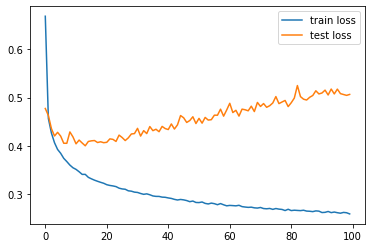

In [20]:
plt.plot(history.history['loss'],label = 'train loss')
plt.plot(history.history['val_loss'],label = 'test loss')
plt.legend();

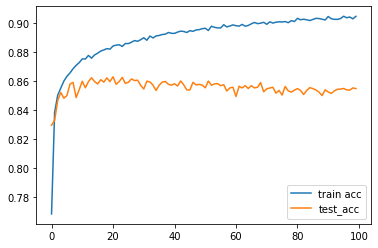

In [21]:
plt.plot(history.history['acc'],label = 'train acc')
plt.plot(history.history['val_acc'],label = 'test_acc')
plt.legend();


In [23]:
train_pred = np.rint(class_model.predict(X_train))
test_pred = np.rint(class_model.predict(X_test))

In [24]:
print('training scores')
print(classification_report(y_train,train_pred))

print('test scores')
print(classification_report(y_test,test_pred))

training scores
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4498
           1       0.99      0.98      0.98      4497
           2       0.87      0.78      0.83      4491
           3       0.94      0.90      0.92      4498
           4       0.84      0.83      0.83      4496
           5       0.98      0.99      0.99      4500
           6       0.81      0.69      0.74      4492
           7       0.99      0.95      0.97      4497
           8       0.99      0.98      0.99      4500
           9       0.96      0.99      0.97      4498

   micro avg       0.93      0.89      0.91     44967
   macro avg       0.92      0.89      0.91     44967
weighted avg       0.92      0.89      0.91     44967
 samples avg       0.89      0.89      0.89     44967

test scores
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1500
           1       0.98      0.97      0.97      1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
n_col = X_train.shape[1]
class_model2 = Sequential()
class_model2.add(keras.layers.Reshape((28,28,1),input_dim = X_train.shape[1]))
class_model2.add(keras.layers.BatchNormalization())

In [31]:
# Build the model
# Create the model


class_model2.add(keras.layers.Conv2D(32, 
                                 kernel_size=(3,3), 
                                 activation='relu'))

class_model2.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

class_model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [32]:
class_model2.add(keras.layers.Flatten())


class_model2.add(keras.layers.Dense(128, activation='relu'))


class_model2.add(keras.layers.Dropout(0.25))


class_model2.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
class_model2.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['acc'])

In [34]:
# Fit the model

History = class_model2.fit(X_train,y_train,
                    validation_data = (X_test,y_test),
                    epochs = 5)

Epoch 1/5
1406/1406 [==============================] - 133s 95ms/step - loss: 0.4131 - acc: 0.8537 - val_loss: 0.2956 - val_acc: 0.8940
Epoch 2/5
1406/1406 [==============================] - 130s 93ms/step - loss: 0.2551 - acc: 0.9076 - val_loss: 0.2407 - val_acc: 0.9125
Epoch 3/5
1406/1406 [==============================] - 129s 92ms/step - loss: 0.1966 - acc: 0.9283 - val_loss: 0.2463 - val_acc: 0.9138
Epoch 4/5
1406/1406 [==============================] - 129s 92ms/step - loss: 0.1505 - acc: 0.9443 - val_loss: 0.2541 - val_acc: 0.9179
Epoch 5/5
1406/1406 [==============================] - 129s 92ms/step - loss: 0.1193 - acc: 0.9557 - val_loss: 0.2542 - val_acc: 0.9189


In [35]:
class_train_pred = np.rint(class_model2.predict(X_train))
class_test_pred = np.rint(class_model2.predict(X_test))

In [36]:
print('training scores')
print(classification_report(y_train,class_train_pred))

print('test scores')
print(classification_report(y_test,class_test_pred))

training scores
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4498
           1       1.00      1.00      1.00      4497
           2       0.95      0.97      0.96      4491
           3       0.98      0.99      0.98      4498
           4       0.96      0.96      0.96      4496
           5       1.00      0.99      1.00      4500
           6       0.96      0.89      0.93      4492
           7       0.99      0.99      0.99      4497
           8       1.00      1.00      1.00      4500
           9       0.99      1.00      0.99      4498

   micro avg       0.98      0.97      0.98     44967
   macro avg       0.98      0.97      0.98     44967
weighted avg       0.98      0.97      0.98     44967
 samples avg       0.97      0.97      0.97     44967

test scores
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1500
           1       0.99      0.99      0.99      1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
